# Preprocessing – SPCBViTNet Input Preparation (BlackHat Hair Removal)

📌 This notebook handles **input preprocessing** for the HAM10000 and PAD-UFES-20 datasets.  
Key operations include:
- Hair removal using **BlackHat morphological transformation**
- Image resizing to `224×224`
- Pixel normalization (0–1 scale)

🎯 Output: Cleaned, resized, normalized dataset used across all SPCBViTNet model evaluations.

🧪 Part of the submission titled:  
**SPCBViTNet: Enhancing Skin Cancer Diagnosis with Multi-Scale Vision Transformers and Adaptive Spatial-Channel Attention**

🔒 Not peer-reviewed. Please do not cite or reuse until official publication.

📁 Repository: [https://github.com/diyagoyal31/SPCBViT](https://github.com/diyagoyal31/SPCBViT)


In [1]:
import cv2
import numpy as np
import os

# Function for smooth hair removal
def remove_hair_smoothly(image_path, save_path=None):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return

    #  Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Black Hat operation
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))  # Smaller kernel for finer hair detection
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)

    # Create a binary mask for hair
    _, mask = cv2.threshold(blackhat, 15, 255, cv2.THRESH_BINARY)  # Fine-tune threshold for hair only

    # Refine the mask with Gaussian blur for smooth transitions
    refined_mask = cv2.GaussianBlur(mask, (5, 5), sigmaX=2)

    # Dilate the mask slightly to ensure full hair coverage
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    refined_mask = cv2.dilate(refined_mask, kernel_dilate, iterations=1)

    # Inpaint the original image using the refined mask
    inpainted_image = cv2.inpaint(image, refined_mask.astype(np.uint8), inpaintRadius=1, flags=cv2.INPAINT_TELEA)

    if save_path:
        cv2.imwrite(save_path, inpainted_image)
    else:
        return inpainted_image

input_folder = "dataset2" 
output_folder = "Preprocessed_PAD_Smooth_Hair_Removal"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file_name in os.listdir(input_folder):
    if file_name.endswith((".jpg", ".png")): 
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)
        remove_hair_smoothly(input_path, output_path)

print("Hair removal preprocessing completed!")


Hair removal preprocessing completed!


In [5]:
from PIL import Image
import os

# Set the path to your image directory
image_dir = "Preprocessed_PAD_224x224_Normalized"
# Define the minimum required size
min_width, min_height = 224, 224

# List to store images that are too small
too_small_images = []

# Scan each image file
for filename in os.listdir(image_dir):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_path = os.path.join(image_dir, filename)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                if width < min_width or height < min_height:
                    too_small_images.append((filename, img.size))
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Report
if too_small_images:
    print("\nImages smaller than 224x224:")
    for name, size in too_small_images:
        print(f"{name}: {size}")
else:
    print("✅ All images are at least 224x224 in size.")


✅ All images are at least 224x224 in size.


In [4]:
import cv2
import numpy as np
import os

def preprocess_image(image_path, save_path=None):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return

    # Resize the image to 224x224
    resized_image = cv2.resize(image, (224, 224))

    # Normalize the RGB channels to [-1, 1]
    normalized_image = resized_image.astype(np.float32) / 255.0  # Normalize to [0, 1]
    normalized_image = (normalized_image - 0.5) * 2  # Shift to [-1, 1]

    # save or return the result
    if save_path:
        save_image = ((normalized_image + 1) / 2 * 255).astype(np.uint8)
        cv2.imwrite(save_path, save_image)
    else:
        return normalized_image

input_folder = "Preprocessed_PAD_Smooth_Hair_Removal"  
output_folder = "Preprocessed_PAD_224x224_Normalized"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file_name in os.listdir(input_folder):
    if file_name.endswith((".jpg", ".png")): 
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, file_name)
        preprocess_image(input_path, output_path)

print("Image preprocessing completed!")


Image preprocessing completed!



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.




A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.4 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Class Counts:
diagnostic
BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: count, dtype: int64


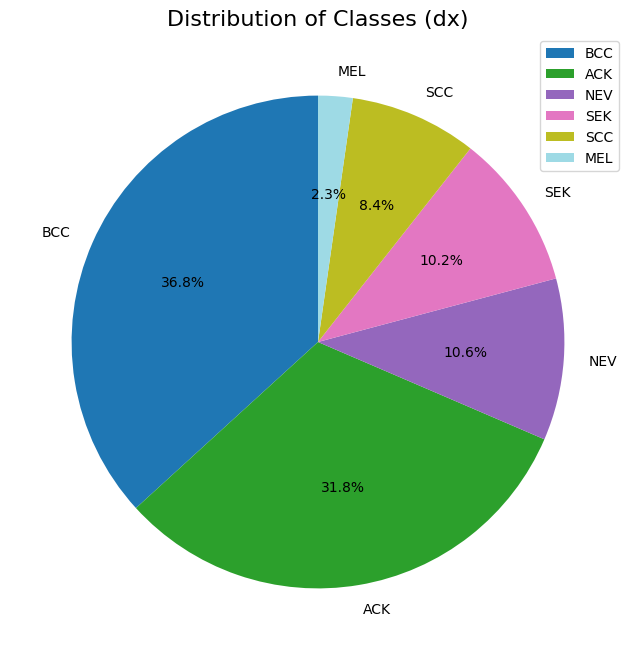

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "metadata_PAD.csv"
df = pd.read_csv(file_path)

class_counts = df["diagnostic"].value_counts()

print("Class Counts:")
print(class_counts)

plt.figure(figsize=(8, 8))
class_counts.plot.pie(
    autopct='%1.1f%%', 
    startangle=90,      
    cmap="tab20",       
    legend=True         
)
plt.title("Distribution of Classes (dx)", fontsize=16)
plt.ylabel("")  
plt.show()